## Linear Discriminant Analysis
### Sajjad Ranjbar
9812223294

[Documentation](https://github.com/Data-analysis-FUM/LDA)

### Required libraries

In [1]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt

##### We implement the algorithm of the book in the class

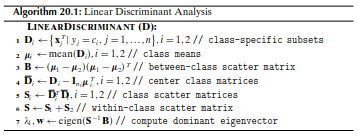


In [2]:
class LinearDiscriminantAnalysis:
    
    def __init__(data, dataset):
        data.df = dataset
    
    def header(data):
        return(data.df.head())
    
    def subdf(data):
        subdf = data.df[[0, 1]]
        return(subdf)
    
    def Iris_setosa(data):
        subdf = data.df[data.df[4] == "Iris-setosa"]
        return(subdf)
    
    def NO_Iris_setosa(data):
        subdf = data.df[data.df[4] != "Iris-setosa"]
        return(subdf)
    
    
    def plot__class(data):
        cl1 = data.Iris_setosa()
        cl2 = data.NO_Iris_setosa()
        plt.scatter(cl1[0], cl1[1])
        plt.scatter(cl2[0], cl2[1])
        plt.show()
        
    
    def LDA(data):
        D = data.subdf()
        counter = -1
        count_row = D.shape[0]
        
        
        #class-specific subsets:
        d1 = data.Iris_setosa()
        d2 = data.NO_Iris_setosa()
    
        #class means:
        m1 = np.matrix([d1[0].mean(), d1[1].mean()])
        m2 = np.matrix([d2[0].mean(), d2[1].mean()])
        
        
        diff = m1-m2
        diffT = np.transpose(diff)
        
        
        #between-class scatter matrix:
        B = np.multiply(diff, diffT)
        
        one1 = np.ones((1, 50))
        one2 = np.ones((1, 100))
        
        dM1 = np.matrix([d1[0], d1[1]])
        dM2 = np.matrix([d2[0], d2[1]])
        
        #center class matrices:
        Dhat1 = dM1 - np.matmul(np.transpose(m1), one1)
        Dhat2 = dM2 - np.matmul(np.transpose(m2), one2)
        
        dT1 = np.transpose(dM1)
        dT2 = np.transpose(dM2)
        
        #class scatter matrices:
        s1 = np.matmul(Dhat1, dT1)
        s2 = np.matmul(Dhat2, dT2)
        
        #within-class scatter matrix:
        s = s1 + s2
        s_inv = np.linalg.inv(s)        

        #compute dominant eigenvector:
        W = np.matmul(s_inv, B)
        w = LA.eig(W)
        
        
        return(w[1])
    
    
    
    def get_W(data):
        w = data.LDA();
        a = w
        r = a.tolist()
        W = np.matrix([r[0][0], r[1][0]])
        
        return(W)
    
    
    def plot_class(data):
        cl1 = data.Iris_setosa()
        cl2 = data.NO_Iris_setosa()
        
        plt.scatter(cl1[0], cl1[1])
        plt.scatter(cl2[0], cl2[1])
        
        plt.grid()
        plt.show()
        
        
    def plot_line(data):
        cl1 = data.Iris_setosa()
        cl2 = data.NO_Iris_setosa()
        
        w = data.LDA()
        a = w
        r = a.tolist()
        
        x = (r[0][0], r[0][1])
        y = (r[1][0], r[1][1])
        
        
        m = (r[0][0] - r[0][1])/(r[1][0] - r[1][1])
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        
        
        plt.plot(w)
        plt.axline((0, m+2), slope=0.25, color="black", linestyle=(0, (5, 5)))

        
        data.plot_class()
        
        
        
        
        

            
        

#### Read dataset

In [3]:
dataset = pd.read_csv('iris.data', header=None)

#### Call class

In [4]:
data = LinearDiscriminantAnalysis(dataset)

In [5]:
data.header()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Flowers that are Iris Setosa

In [6]:
data.Iris_setosa()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Flowers that are not Iris Setosa

In [7]:
data.NO_Iris_setosa()

,0,1,2,3,4
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### attributes sepal length and sepal width

In [8]:
data.subdf()

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [9]:
data.LDA()

matrix([[ 0.55110672,  0.39867271],
        [-0.83443477,  0.91709327]])

In [10]:
data.get_W()

matrix([[ 0.55110672, -0.83443477]])

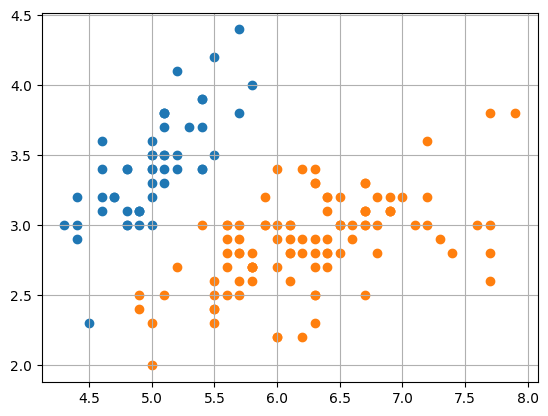

In [11]:
data.plot_class()

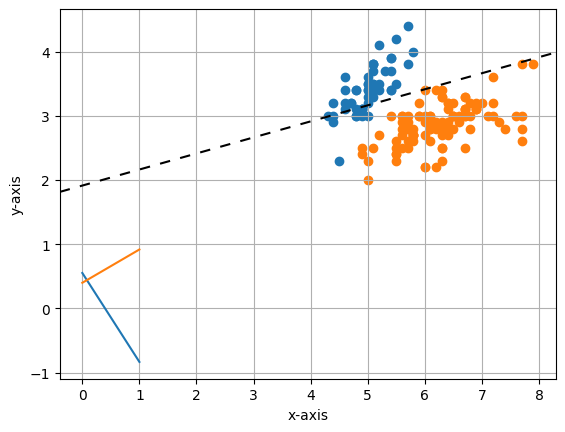

In [12]:
data.plot_line()